## 3803ICT_Assignment

#### Connor Aitken s5181649 
#### Jordan Rogers s2885584

### Part 1 - Data Preparation and Preprocessing

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
df = pd.read_csv('../data/data.csv', low_memory=False)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [5]:
# Check dtypes
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [6]:
# Change Date dtype to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Remove all '&searchrequesttoken...' strings from Id column
df['Id'] = df['Id'].str.split('&').str[0]
df['Id'] = df['Id'].astype(int)
df.dtypes

Id                                 int32
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
Requirement                       object
FullDescription                   object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
dtype: object

In [8]:
# Check for duplicates
df[df.duplicated()].shape[0]

108

In [9]:
# Drop duplicates
df = df.drop_duplicates()
df[df.duplicated()].shape[0]

0

In [10]:
# Check for null entries
df.isnull().sum()

Id                        0
Title                     0
Company               11997
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16135
LowestSalary              0
HighestSalary             0
JobType               16058
dtype: int64

In [11]:
# Replace null Classifications with most common Classifcation corresponding to the job title 
# Replaces around 50,000 null values
df.loc[df['Classification'].isna(), 'Classification'] = df.groupby(['Title'])['Classification'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

# Replace null SubClassification with most common SubClassification corresponding to the job title
# Replaces around 50,000 null values
df.loc[df['SubClassification'].isna(), 'SubClassification'] = df.groupby(['Title'])['SubClassification'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

# Replace null Areas with most common Area corresponding to the job title
# Replaces around 65,000 null values
df.loc[df['Area'].isna(), 'Area'] = df.groupby(['Title'])['Area'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

# Drop null entries if they haven't been filled by the above
df = df.dropna(subset=['Classification'])
df.isnull().sum()

Id                       0
Title                    0
Company               9266
Date                     0
Location             51402
Area                 58904
Classification           0
SubClassification        0
Requirement              4
FullDescription      13583
LowestSalary             0
HighestSalary            0
JobType              13519
dtype: int64

In [12]:
# Fill remaining null values
df["Company"].fillna("No Company", inplace = True)
df["Location"].fillna("No Location", inplace = True)
df["Area"].fillna("No Area", inplace = True)

df["Requirement"].fillna("No Requirement", inplace = True)
df["FullDescription"].fillna("No Description", inplace = True)
df["JobType"].fillna("No JobType", inplace = True)
df.isnull().sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
dtype: int64

In [13]:
df['FullDescription'][121]

'<p>&nbsp;</p>\n        <p><strong><em>*&nbsp; Secure long term role with genuine career path to supervisor</em></strong></p>\n        <p><strong><em>*&nbsp; Competitive hourly rate with regular opportunity for overtime</em></strong></p>\n        <p><strong><em>*&nbsp; Full on-the-job training</em></strong></p>\n        <p><strong>About the&nbsp;role</strong></p>\n        <p>Having recently won a significant new national contract we are looking for another trade qualified person with welding and fabrication skills to help manage increased demands on our production and installation departments.&nbsp; This role will\n          see you involved in both manufacturing and on-site installation and there is a genuine career path to supervisor if that is your goal.&nbsp; Initially your role will require you to:-</p>\n        <ul>\n          <li>read and interpret drawings&nbsp;</li>\n          <li>fabricate and assemble orders as required</li>\n          <li>provide input to enhance factory pr

In [14]:
# Clean 'FullDescription' of html tags, symbols and extra spaces
df['FullDescription'] = df['FullDescription'].str.replace('\&(.*?)\;', ' ')
df['FullDescription'] = df['FullDescription'].str.replace('<[^<]+?>', ' ')
df['FullDescription'] = df['FullDescription'].str.replace('\n', ' ')
df['FullDescription'] = df['FullDescription'].str.replace('*', ' ')
df['FullDescription'] = df['FullDescription'].str.replace('\s+', ' ')

In [15]:
df['FullDescription'][121]

' Secure long term role with genuine career path to supervisor Competitive hourly rate with regular opportunity for overtime Full on-the-job training About the role Having recently won a significant new national contract we are looking for another trade qualified person with welding and fabrication skills to help manage increased demands on our production and installation departments. This role will see you involved in both manufacturing and on-site installation and there is a genuine career path to supervisor if that is your goal. Initially your role will require you to:- read and interpret drawings fabricate and assemble orders as required provide input to enhance factory processes pack and dispatch orders perform on-site installations (full training will be given) About you This role is ideal for a trade qualified person (welder, boilermaker, fabricator etc) with good hands-on skills who will enjoy dividing their time between factory/manufacturing and on-site installations. Because 

### Part 2 - Data Analysis and Interpretation

In [14]:
df.Classification.unique()

array(['Retail & Consumer Products', 'Call Centre & Customer Service',
       'Hospitality & Tourism', 'Banking & Financial Services',
       'Manufacturing, Transport & Logistics', 'Sales',
       'Administration & Office Support', 'Trades & Services',
       'Accounting', 'Real Estate & Property', 'Healthcare & Medical',
       'Marketing & Communications', 'Government & Defence',
       'Information & Communication Technology', 'Education & Training',
       'Community Services & Development', 'Mining, Resources & Energy',
       'Human Resources & Recruitment', 'Insurance & Superannuation',
       'Engineering', 'CEO & General Management', 'Design & Architecture',
       'Legal', 'Construction', 'Sport & Recreation',
       'Science & Technology', 'Advertising, Arts & Media',
       'Farming, Animals & Conservation', 'Self Employment',
       'Consulting & Strategy'], dtype=object)

In [15]:
df['Classification'].value_counts()

Information & Communication Technology    28489
Trades & Services                         22304
Healthcare & Medical                      20956
Hospitality & Tourism                     19397
Manufacturing, Transport & Logistics      15774
Administration & Office Support           14510
Accounting                                12792
Construction                              11291
Education & Training                      10769
Sales                                     10734
Retail & Consumer Products                 9309
Government & Defence                       8259
Engineering                                7967
Mining, Resources & Energy                 7815
Banking & Financial Services               5620
Community Services & Development           5537
Human Resources & Recruitment              5499
Call Centre & Customer Service             5399
Marketing & Communications                 5336
Legal                                      5173
Real Estate & Property                  

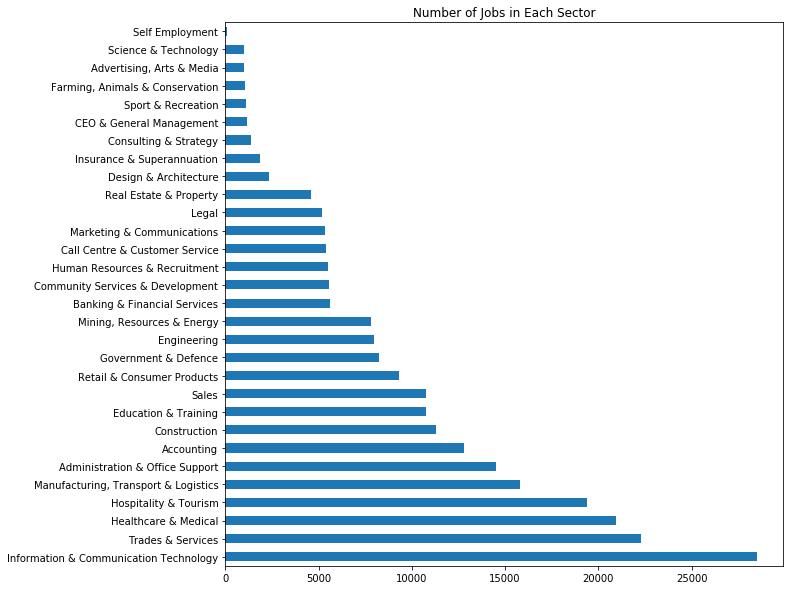

In [16]:
counts = df['Classification'].value_counts()

plt.title('Number of Jobs in Each Sector')
counts.plot.barh(figsize = (10, 10))

Text(0.5, 1.0, 'Number of Jobs in Each Sector')

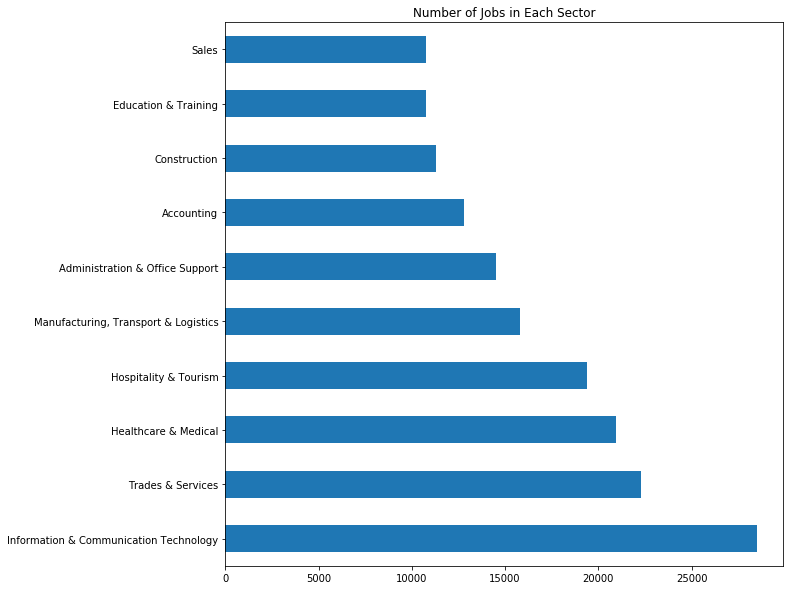

In [17]:
counts.nlargest(10).plot.barh(figsize = (10, 10))
plt.title('Number of Jobs in Each Sector')

In [18]:
df.SubClassification.unique()

array(['Retail Assistants', 'Sales - Inbound',
       'Customer Service - Call Centre', 'Waiting Staff',
       'Sales - Outbound', 'Kitchen & Sandwich Hands',
       'Banking - Retail/Branch', 'Customer Service - Customer Facing',
       'Bar & Beverage Staff', 'Housekeeping', 'Other',
       'Assembly & Process Work', 'Purchasing, Procurement & Inventory',
       'Sales Representatives/Consultants', 'Chefs/Cooks',
       'Records Management & Document Control', 'Analysis & Reporting',
       'Office Management', 'Warehousing, Storage & Distribution',
       'Security Services', 'Administrative Assistants',
       'Management - Store', 'Contracts Administration', 'Road Transport',
       'Front Office & Guest Services', 'PA, EA & Secretarial',
       'Team Leaders/Supervisors', 'Cleaning Services',
       'Bookkeeping & Small Practice Accounting',
       'Commercial Sales, Leasing & Property Mgmt',
       'New Business Development', 'Management - Department/Assistant',
       'Hair & 

In [19]:
df['SubClassification'].value_counts()

Other                         12825
Management                     8094
Administrative Assistants      6985
Chefs/Cooks                    5847
Developers/Programmers         5341
                              ...  
Chiropractic & Osteopathic       15
Illustration & Animation         15
Computer Operators               14
Modelling & Simulation           14
Army                              5
Name: SubClassification, Length: 338, dtype: int64

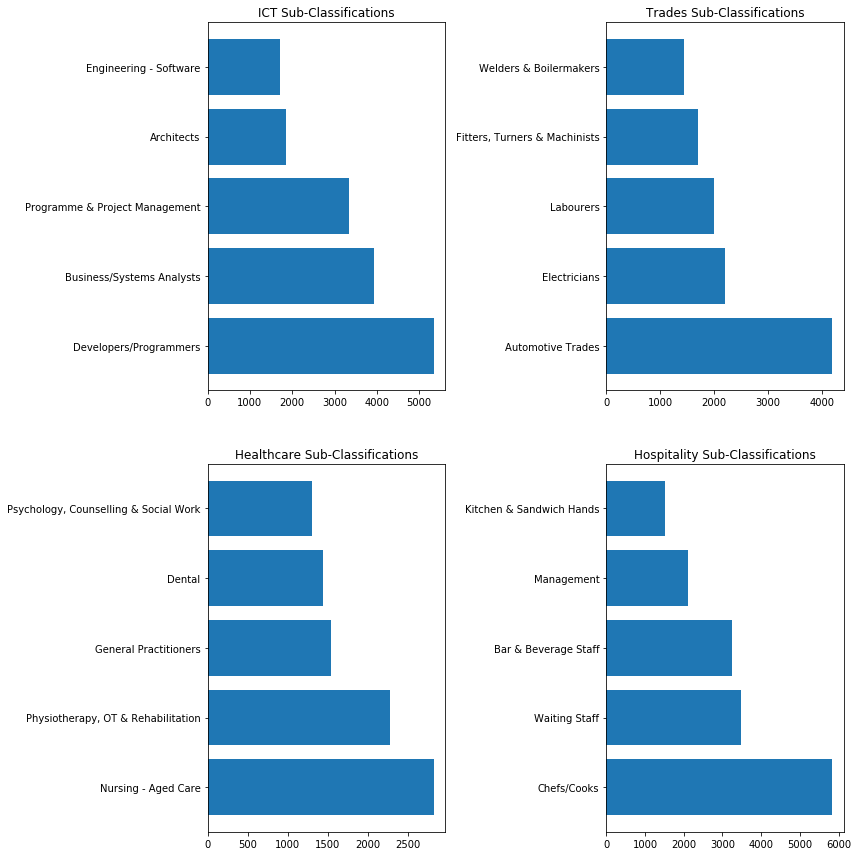

In [20]:
ICTCounts = df.loc[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts().nlargest(5)
TradesCounts = df.loc[df['Classification'] == 'Trades & Services']['SubClassification'].value_counts().nlargest(5)
HealthcareCounts = df.loc[df['Classification'] == 'Healthcare & Medical']['SubClassification'].value_counts().nlargest(5)
HospoCounts = df.loc[df['Classification'] == 'Hospitality & Tourism']['SubClassification'].value_counts().nlargest(5)

fig = plt.figure(figsize= (12, 12))

plt.subplot(2,2,1, title = 'ICT Sub-Classifications')
plt.barh(ICTCounts.keys(), ICTCounts)

plt.subplot(2,2,2, title = 'Trades Sub-Classifications')
plt.barh(TradesCounts.keys(), TradesCounts)

plt.subplot(2,2,3, title = 'Healthcare Sub-Classifications')
plt.barh(HealthcareCounts.keys(), HealthcareCounts)

plt.subplot(2,2,4, title = 'Hospitality Sub-Classifications')
plt.barh(HospoCounts.keys(), HospoCounts)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

Sydney       60729
Melbourne    46656
Brisbane     21455
Perth        13192
Adelaide      6650
Name: Location, dtype: int64


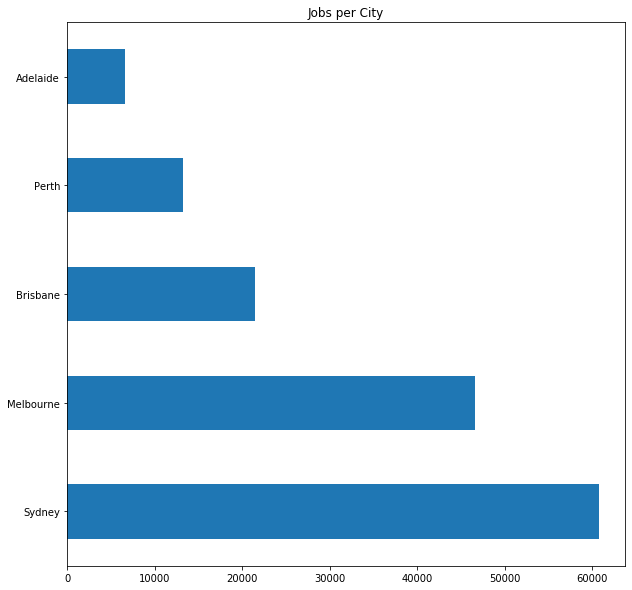

In [21]:
#Find 5 locations with most jobs. Excludes any rows where location is unknown.

locationCounts = df['Location'].loc[df['Location'] != 'No Location'].value_counts().nlargest(5)

print(locationCounts)
plt.title('Jobs per City')
locationCounts.plot.barh(figsize = (10, 10))

In [22]:
# We should use the average salary instead of lowest or highest ranges
df = df.assign(AverageSalary= (df["LowestSalary"] + df["HighestSalary"])/2)

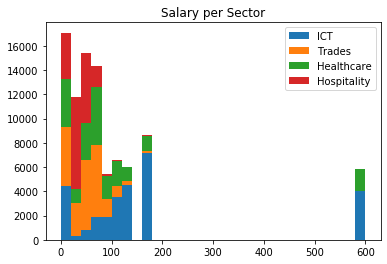

<Figure size 1440x1440 with 0 Axes>

In [23]:
ICTSalaryCounts = df.loc[df['Classification'] == 'Information & Communication Technology']['AverageSalary']
TradesSalaryCounts = df.loc[df['Classification'] == 'Trades & Services']['AverageSalary']
HealthcareSalaryCounts = df.loc[df['Classification'] == 'Healthcare & Medical']['AverageSalary']
HospitalitySalaryCounts = df.loc[df['Classification'] == 'Hospitality & Tourism']['AverageSalary']

x = [ICTSalaryCounts, TradesSalaryCounts, HealthcareSalaryCounts, HospitalitySalaryCounts]

fig, ax = plt.subplots()
plt.hist(x, bins = 30, range = (0, 600), stacked = True)
plt.legend(['ICT', 'Trades', 'Healthcare', 'Hospitality'])
plt.title('Salary per Sector')
plt.figure(figsize=(20,20))

plt.show()

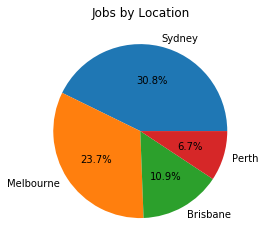

In [24]:
locationCountsTotal = df['Location'].loc[df['Location'] != 'No Location'].value_counts()
percentages = ((locationCounts / locationCountsTotal.sum()) * 100).to_numpy()
i = 0

def make_autopct(percentages):
    global i
    percentage = percentages[i]
    i = i + 1
    return '{:.1f}%'.format(percentage)

plt.pie(locationCounts.nlargest(4), labels = ['Sydney', 'Melbourne', 'Brisbane', 'Perth'], autopct=lambda pct: make_autopct(percentages))
plt.title("Jobs by Location")

plt.show()

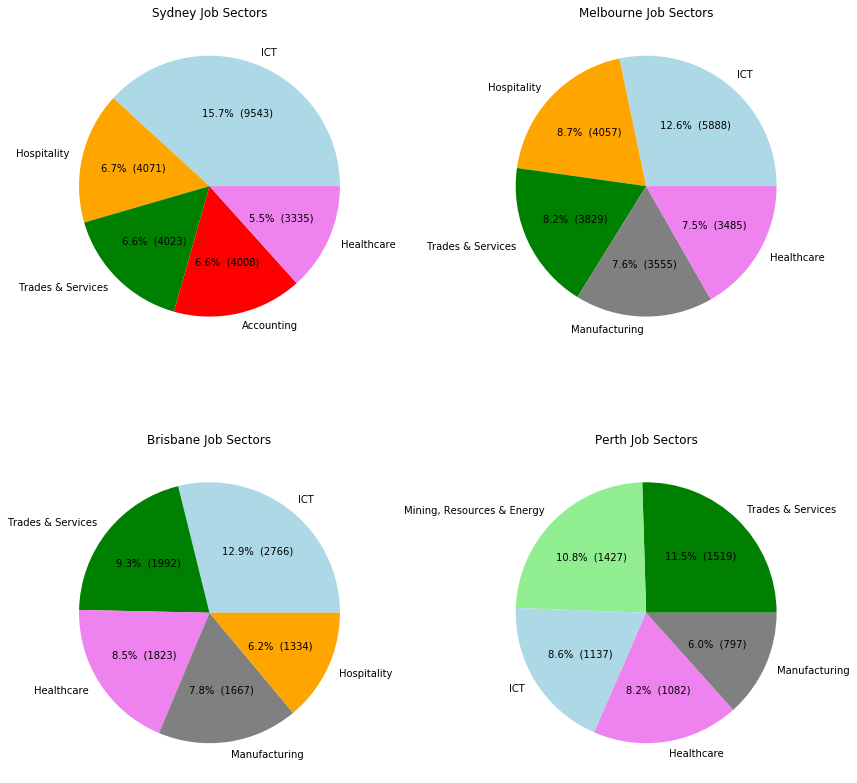

In [25]:
fig = plt.figure(figsize= (12, 12))

i = 0
def make_autopct(counts, locationCounts):
    global i
    count = counts[i]
    percentage = (counts[i] / locationCounts) * 100
    i = i + 1
    return '{:.1f}%  ({:d})'.format(percentage, count)

SydneySectorCounts = df.loc[df['Location'] == 'Sydney']['Classification'].value_counts().nlargest(5)
label = ['ICT', 'Hospitality', 'Trades & Services', 'Accounting', 'Healthcare']
colors = ['lightblue', 'orange', 'green', 'red', 'violet']
plt.subplot(2,2,1, title = 'Sydney Job Sectors')
plt.pie(SydneySectorCounts, labels = label, autopct=lambda pct: make_autopct(SydneySectorCounts, locationCounts['Sydney']), colors = colors)
i = 0

MelbourneSectorCounts = df.loc[df['Location'] == 'Melbourne']['Classification'].value_counts().nlargest(5)
label = ['ICT', 'Hospitality', 'Trades & Services', 'Manufacturing', 'Healthcare']
colors = ['lightblue', 'orange', 'green', 'grey', 'violet']
plt.subplot(2,2,2, title = 'Melbourne Job Sectors')
plt.pie(MelbourneSectorCounts, labels = label, autopct=lambda pct: make_autopct(MelbourneSectorCounts, locationCounts['Melbourne']), colors = colors)
i = 0
BrisbaneSectorCounts = df.loc[df['Location'] == 'Brisbane']['Classification'].value_counts().nlargest(5)
label = ['ICT', 'Trades & Services', 'Healthcare', 'Manufacturing', 'Hospitality']
colors = ['lightblue', 'green', 'violet', 'grey', 'orange']
plt.subplot(2,2,3, title = 'Brisbane Job Sectors')
plt.pie(BrisbaneSectorCounts, labels = label, autopct=lambda pct: make_autopct(BrisbaneSectorCounts, locationCounts['Brisbane']), colors = colors)
i = 0

PerthSectorCounts = df.loc[df['Location'] == 'Perth']['Classification'].value_counts().nlargest(5)
label = ['Trades & Services', 'Mining, Resources & Energy', 'ICT', 'Healthcare', 'Manufacturing']
colors = ['green', 'lightgreen', 'lightblue', 'violet', 'grey']
plt.subplot(2,2,4, title = 'Perth Job Sectors')
plt.pie(PerthSectorCounts, labels = label, autopct=lambda pct: make_autopct(PerthSectorCounts, locationCounts['Perth']), colors = colors)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

plt.show()

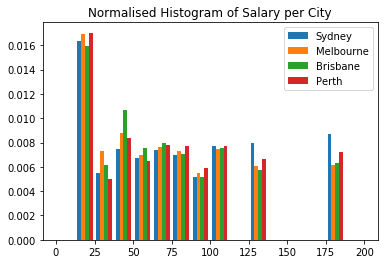

<Figure size 1440x1440 with 0 Axes>

In [26]:
SydneySalaryCounts = df.loc[df['Location'] == 'Sydney']['AverageSalary']
MelbourneSalaryCounts = df.loc[df['Location'] == 'Melbourne']['AverageSalary']
BrisbaneSalaryCounts = df.loc[df['Location'] == 'Brisbane']['AverageSalary']
PerthSalaryCounts = df.loc[df['Location'] == 'Perth']['AverageSalary']
PerthSalaryCounts = df.loc[df['Location'] == 'Perth']['AverageSalary']

x = [SydneySalaryCounts, MelbourneSalaryCounts, BrisbaneSalaryCounts, PerthSalaryCounts]

fig, ax = plt.subplots()
plt.hist(x, bins = 16, range = (0, 200), stacked = False, density = 1)
plt.title('Normalised Histogram of Salary per City')
plt.legend(['Sydney', 'Melbourne', 'Brisbane', 'Perth'])
plt.figure(figsize=(20,20))
plt.show()

10    113782
12     55196
11     40985
1      29579
2       8818
3        163
Name: Month, dtype: int64


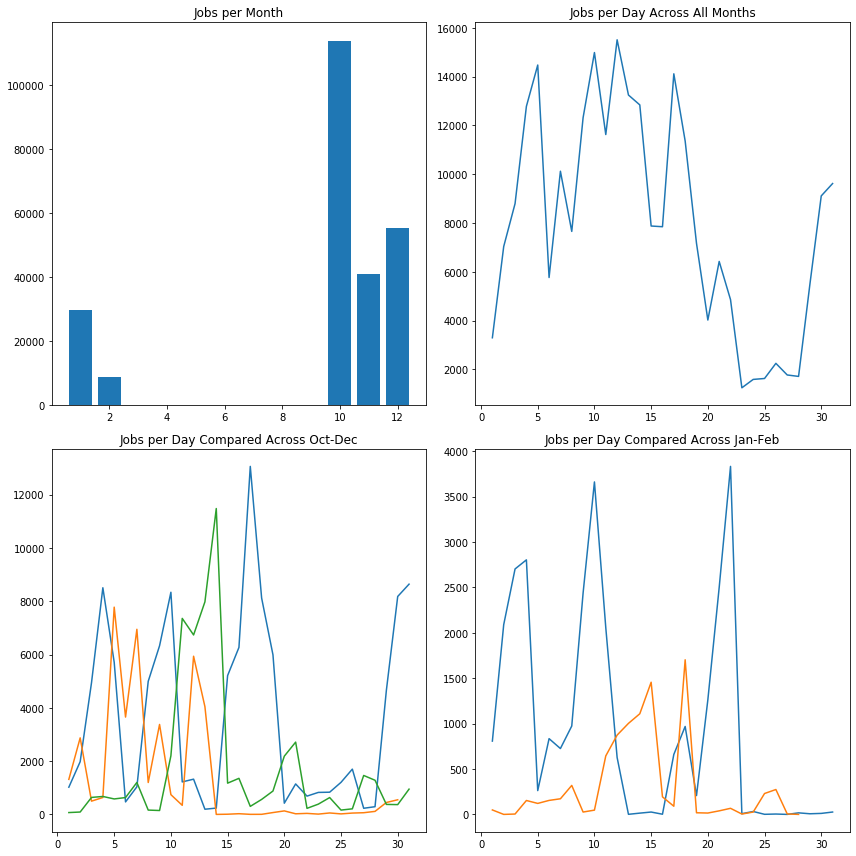

In [27]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
months = df['Month'].value_counts()
print(months)
#plt.bar(monthsLabels, months)

dates = df['Date'].value_counts()
days = df['Day'].value_counts().sort_index()
OctoberDays = df.loc[df['Month'] == 10]['Day'].value_counts().sort_index()
NovemberDays = df.loc[df['Month'] == 11]['Day'].value_counts().sort_index()
DecemberDays = df.loc[df['Month'] == 12]['Day'].value_counts().sort_index()
JanuaryDays = df.loc[df['Month'] == 1]['Day'].value_counts().sort_index()
FebruaryDays = df.loc[df['Month'] == 2]['Day'].value_counts().sort_index()
MarchDays = df.loc[df['Month'] == 3]['Day'].value_counts().sort_index()

fig = plt.figure(figsize= (12, 12))

plt.subplot(2,2,1, title = 'Jobs per Month')
plt.bar(months.keys(), months)

plt.subplot(2,2,2, title = 'Jobs per Day Across All Months')
plt.plot(days)

plt.subplot(2,2,3, title = 'Jobs per Day Compared Across Oct-Dec')
plt.plot(OctoberDays)
plt.plot(NovemberDays)
plt.plot(DecemberDays)

plt.subplot(2,2,4, title = 'Jobs per Day Compared Across Jan-Feb')
plt.plot(JanuaryDays)
plt.plot(FebruaryDays)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

plt.show()

In [28]:
df['Classification'].value_counts()

Information & Communication Technology    28489
Trades & Services                         22304
Healthcare & Medical                      20956
Hospitality & Tourism                     19397
Manufacturing, Transport & Logistics      15774
Administration & Office Support           14510
Accounting                                12792
Construction                              11291
Education & Training                      10769
Sales                                     10734
Retail & Consumer Products                 9309
Government & Defence                       8259
Engineering                                7967
Mining, Resources & Energy                 7815
Banking & Financial Services               5620
Community Services & Development           5537
Human Resources & Recruitment              5499
Call Centre & Customer Service             5399
Marketing & Communications                 5336
Legal                                      5173
Real Estate & Property                  

In [29]:
df.shape

(248523, 16)

In [30]:
ICTCounts = df.loc[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts().nlargest(1)
TradesCounts = df.loc[df['Classification'] == 'Trades & Services']['SubClassification'].value_counts().nlargest(1)
HealthcareCounts = df.loc[df['Classification'] == 'Healthcare & Medical']['SubClassification'].value_counts().nlargest(1)
HospoCounts = df.loc[df['Classification'] == 'Hospitality & Tourism']['SubClassification'].value_counts().nlargest(1)

print(ICTCounts)
print(df.loc[df['Classification'] == 'Information & Communication Technology'].shape[0])
print(TradesCounts)
print(df.loc[df['Classification'] == 'Trades & Services'].shape[0])
print(HealthcareCounts)
print(df.loc[df['Classification'] == 'Healthcare & Medical'].shape[0])
print(HospoCounts)
print(df.loc[df['Classification'] == 'Hospitality & Tourism'].shape[0])

Developers/Programmers    5339
Name: SubClassification, dtype: int64
28489
Automotive Trades    4193
Name: SubClassification, dtype: int64
22304
Nursing - Aged Care    2820
Name: SubClassification, dtype: int64
20956
Chefs/Cooks    5843
Name: SubClassification, dtype: int64
19397


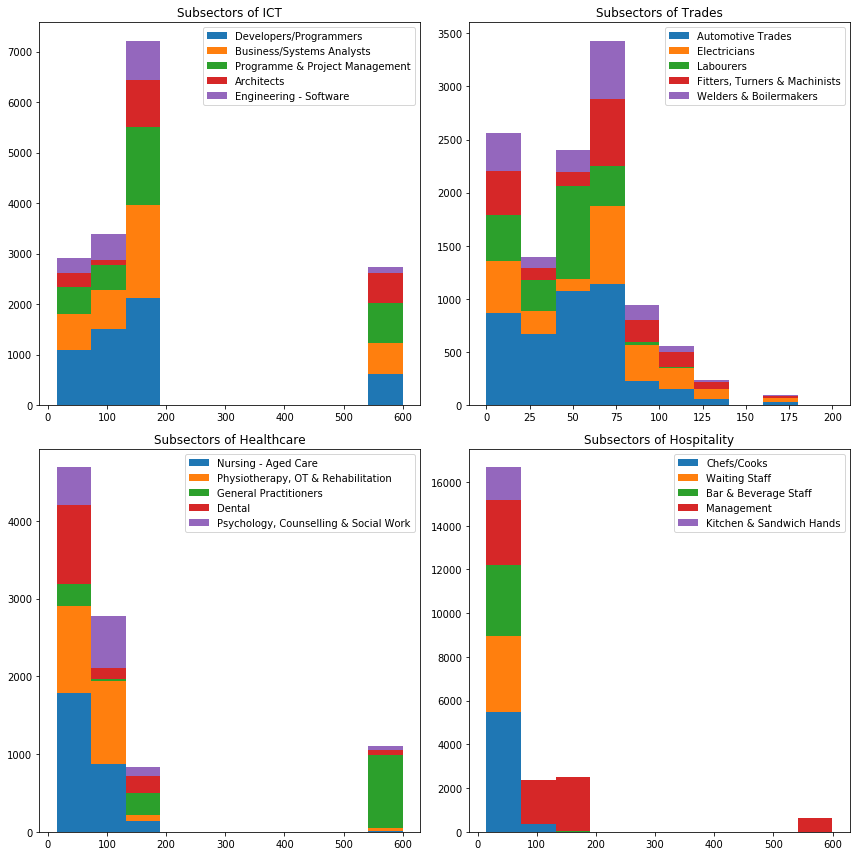

In [31]:
DevSalaryCounts = df.loc[df['SubClassification'] == 'Developers/Programmers']['AverageSalary']
BusSalaryCounts = df.loc[df['SubClassification'] == 'Business/Systems Analysts']['AverageSalary']
ProSalaryCounts = df.loc[df['SubClassification'] == 'Programme & Project Management']['AverageSalary']
ArcSalaryCounts = df.loc[df['SubClassification'] == 'Architects']['AverageSalary']
EngSalaryCounts = df.loc[df['SubClassification'] == 'Engineering - Software']['AverageSalary']

x = [DevSalaryCounts, BusSalaryCounts, ProSalaryCounts, ArcSalaryCounts, EngSalaryCounts]

fig = plt.figure(figsize= (12, 12))
plt.subplot(2,2,1, title = 'Subsectors of ICT')
plt.hist(x, stacked = True)
plt.legend(['Developers/Programmers', 'Business/Systems Analysts', 'Programme & Project Management', 'Architects', 'Engineering - Software'])

AutoSalaryCounts = df.loc[df['SubClassification'] == 'Automotive Trades']['AverageSalary']
ElecSalaryCounts = df.loc[df['SubClassification'] == 'Electricians']['AverageSalary']
LabourSalaryCounts = df.loc[df['SubClassification'] == 'Labourers']['AverageSalary']
FitterSalaryCounts = df.loc[df['SubClassification'] == 'Fitters, Turners & Machinists']['AverageSalary']
WeldersSalaryCounts = df.loc[df['SubClassification'] == 'Welders & Boilermakers']['AverageSalary']

x = [AutoSalaryCounts, ElecSalaryCounts, LabourSalaryCounts, FitterSalaryCounts, WeldersSalaryCounts]

plt.subplot(2,2,2, title = 'Subsectors of Trades')
plt.hist(x, stacked = True, range = (0, 200))
plt.legend(['Automotive Trades', 'Electricians', 'Labourers', 'Fitters, Turners & Machinists', 'Welders & Boilermakers'])

NurseSalaryCounts = df.loc[df['SubClassification'] == 'Nursing - Aged Care']['AverageSalary']
PhysioSalaryCounts = df.loc[df['SubClassification'] == 'Physiotherapy, OT & Rehabilitation']['AverageSalary']
GPSalaryCounts = df.loc[df['SubClassification'] == 'General Practitioners']['AverageSalary']
DentalSalaryCounts = df.loc[df['SubClassification'] == 'Dental']['AverageSalary']
PsychSalaryCounts = df.loc[df['SubClassification'] == 'Psychology, Counselling & Social Work']['AverageSalary']

x = [NurseSalaryCounts, PhysioSalaryCounts, GPSalaryCounts, DentalSalaryCounts, PsychSalaryCounts]

plt.subplot(2,2,3, title = 'Subsectors of Healthcare')
plt.hist(x, stacked = True)
plt.legend(['Nursing - Aged Care', 'Physiotherapy, OT & Rehabilitation', 'General Practitioners', 'Dental', 'Psychology, Counselling & Social Work'])

ChefSalaryCounts = df.loc[df['SubClassification'] == 'Chefs/Cooks']['AverageSalary']
WaitSalaryCounts = df.loc[df['SubClassification'] == 'Waiting Staff']['AverageSalary']
BarSalaryCounts = df.loc[df['SubClassification'] == 'Bar & Beverage Staff']['AverageSalary']
ManageSalaryCounts = df.loc[df['SubClassification'] == 'Management']['AverageSalary']
KitchenSalaryCounts = df.loc[df['SubClassification'] == 'Kitchen & Sandwich Hands']['AverageSalary']

x = [ChefSalaryCounts, WaitSalaryCounts, BarSalaryCounts, ManageSalaryCounts, KitchenSalaryCounts]

plt.subplot(2,2,4, title = 'Subsectors of Hospitality')
plt.hist(x, stacked = True)
plt.legend(['Chefs/Cooks', 'Waiting Staff', 'Bar & Beverage Staff', 'Management', 'Kitchen & Sandwich Hands'])


plt.tight_layout()
plt.show()

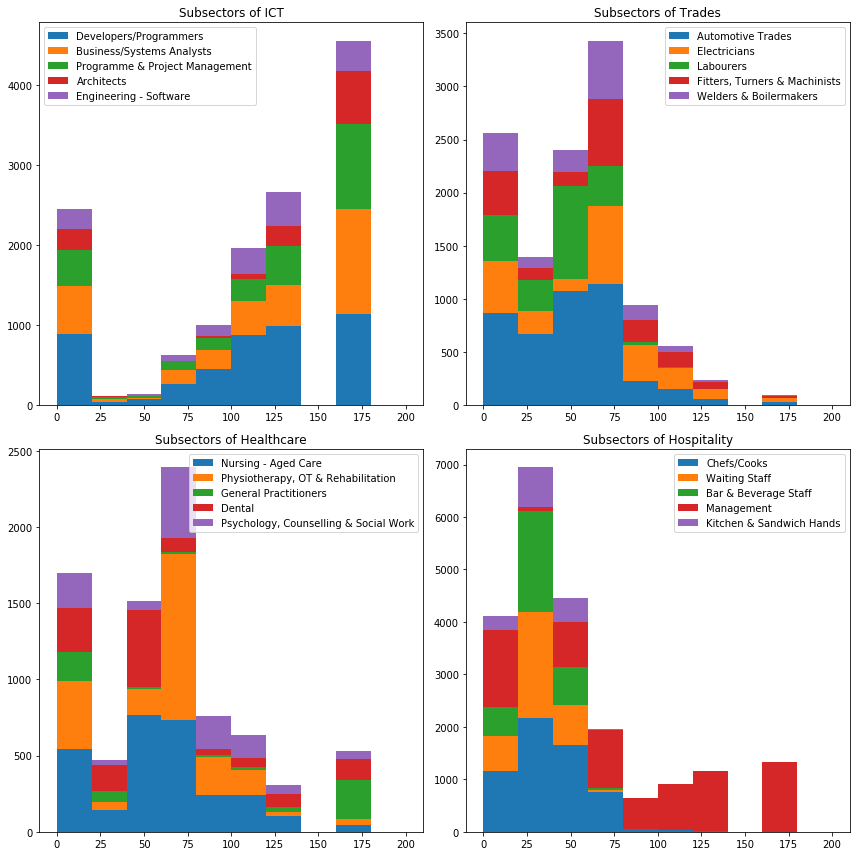

In [32]:
DevSalaryCounts = df.loc[df['SubClassification'] == 'Developers/Programmers']['AverageSalary']
BusSalaryCounts = df.loc[df['SubClassification'] == 'Business/Systems Analysts']['AverageSalary']
ProSalaryCounts = df.loc[df['SubClassification'] == 'Programme & Project Management']['AverageSalary']
ArcSalaryCounts = df.loc[df['SubClassification'] == 'Architects']['AverageSalary']
EngSalaryCounts = df.loc[df['SubClassification'] == 'Engineering - Software']['AverageSalary']

x = [DevSalaryCounts, BusSalaryCounts, ProSalaryCounts, ArcSalaryCounts, EngSalaryCounts]

fig = plt.figure(figsize= (12, 12))
plt.subplot(2,2,1, title = 'Subsectors of ICT')
plt.hist(x, stacked = True, range = (0, 200))
plt.legend(['Developers/Programmers', 'Business/Systems Analysts', 'Programme & Project Management', 'Architects', 'Engineering - Software'])

AutoSalaryCounts = df.loc[df['SubClassification'] == 'Automotive Trades']['AverageSalary']
ElecSalaryCounts = df.loc[df['SubClassification'] == 'Electricians']['AverageSalary']
LabourSalaryCounts = df.loc[df['SubClassification'] == 'Labourers']['AverageSalary']
FitterSalaryCounts = df.loc[df['SubClassification'] == 'Fitters, Turners & Machinists']['AverageSalary']
WeldersSalaryCounts = df.loc[df['SubClassification'] == 'Welders & Boilermakers']['AverageSalary']

x = [AutoSalaryCounts, ElecSalaryCounts, LabourSalaryCounts, FitterSalaryCounts, WeldersSalaryCounts]

plt.subplot(2,2,2, title = 'Subsectors of Trades')
plt.hist(x, stacked = True, range = (0, 200))
plt.legend(['Automotive Trades', 'Electricians', 'Labourers', 'Fitters, Turners & Machinists', 'Welders & Boilermakers'])

NurseSalaryCounts = df.loc[df['SubClassification'] == 'Nursing - Aged Care']['AverageSalary']
PhysioSalaryCounts = df.loc[df['SubClassification'] == 'Physiotherapy, OT & Rehabilitation']['AverageSalary']
GPSalaryCounts = df.loc[df['SubClassification'] == 'General Practitioners']['AverageSalary']
DentalSalaryCounts = df.loc[df['SubClassification'] == 'Dental']['AverageSalary']
PsychSalaryCounts = df.loc[df['SubClassification'] == 'Psychology, Counselling & Social Work']['AverageSalary']

x = [NurseSalaryCounts, PhysioSalaryCounts, GPSalaryCounts, DentalSalaryCounts, PsychSalaryCounts]

plt.subplot(2,2,3, title = 'Subsectors of Healthcare')
plt.hist(x, stacked = True, range = (0, 200))
plt.legend(['Nursing - Aged Care', 'Physiotherapy, OT & Rehabilitation', 'General Practitioners', 'Dental', 'Psychology, Counselling & Social Work'])

ChefSalaryCounts = df.loc[df['SubClassification'] == 'Chefs/Cooks']['AverageSalary']
WaitSalaryCounts = df.loc[df['SubClassification'] == 'Waiting Staff']['AverageSalary']
BarSalaryCounts = df.loc[df['SubClassification'] == 'Bar & Beverage Staff']['AverageSalary']
ManageSalaryCounts = df.loc[df['SubClassification'] == 'Management']['AverageSalary']
KitchenSalaryCounts = df.loc[df['SubClassification'] == 'Kitchen & Sandwich Hands']['AverageSalary']

x = [ChefSalaryCounts, WaitSalaryCounts, BarSalaryCounts, ManageSalaryCounts, KitchenSalaryCounts]

plt.subplot(2,2,4, title = 'Subsectors of Hospitality')
plt.hist(x, stacked = True, range = (0, 200))
plt.legend(['Chefs/Cooks', 'Waiting Staff', 'Bar & Beverage Staff', 'Management', 'Kitchen & Sandwich Hands'])


plt.tight_layout()
plt.show()

In [33]:
from collections import Counter
globalCounter = Counter()
ignore = {'the','a','if','in','it','of','or','to','for','and','with','an','-','is'}
for r in df.loc[df['Classification'] == 'Information & Communication Technology']['Requirement']:
    split_it = r.split()

    # input values and their respective counts.
    globalCounter.update(x for x in split_it if x not in ignore)
    
print(globalCounter)

Counter({'opportunity': 4068, 'join': 4042, 'on': 4028, '|': 3933, 'contract': 3093, 'team': 3072, 'our': 3066, 'looking': 3005, 'work': 2704, 'experienced': 2683, 'are': 2626, '&': 2500, 'role': 2461, 'Analyst': 2414, 'Senior': 2350, 'Business': 2212, 'experience': 2209, 'based': 2163, 'Manager': 2043, 'Developer': 1999, 'IT': 1965, 'month': 1949, 'seeking': 1796, '6': 1762, 'Project': 1762, 'leading': 1752, 'you': 1719, 'client': 1700, 'We': 1654, 'large': 1572, 'will': 1517, 'Engineer': 1510, 'business': 1508, 'be': 1492, 'Sydney': 1483, 'CBD': 1477, 'required': 1419, 'Data': 1410, 'project': 1363, 'exciting': 1361, '/': 1357, 'support': 1355, 'your': 1354, 'organisation': 1349, 'as': 1332, 'their': 1330, 'working': 1274, 'within': 1271, 'new': 1250, 'Contract': 1232, 'A': 1216, 'this': 1173, 'This': 1129, 'Government': 1106, 'across': 1105, 'company': 1100, 'projects': 1056, 'Join': 1033, 'Our': 1026, 'Architect': 970, 'Security': 946, 'services': 929, 'who': 926, 'Lead': 924, 'Mel

In [34]:
from collections import Counter
globalCounter = Counter()
ignore = {'the','a','if','in','it','of','or','to','for','and','with','an','-','is'}
for r in df.loc[df['Classification'] == 'Trades & Services']['Requirement']:
    split_it = r.split()

    # input values and their respective counts.
    globalCounter.update(x for x in split_it if x not in ignore)
    
print(globalCounter)

Counter({'our': 4815, 'are': 4237, 'join': 4227, 'seeking': 3537, 'experienced': 3343, '&': 2977, 'We': 2736, 'looking': 2711, 'work': 2660, 'team': 2469, 'on': 2283, 'opportunity': 2088, 'required': 1891, 'currently': 1739, 'you': 1602, 'at': 1598, 'qualified': 1483, 'based': 1425, 'have': 1273, 'team.': 1218, 'experience': 1161, 'your': 1115, 'start': 1091, 'company': 1057, 'Service': 1050, '|': 1044, 'time': 1035, 'be': 954, 'available': 942, 'Experienced': 907, '/': 877, 'Technician': 849, 'Immediate': 829, 'career': 827, 'service': 826, 'role': 822, 'Maintenance': 822, 'as': 797, 'their': 796, 'position': 794, 'maintenance': 782, 'Qualified': 775, 'working': 772, 'immediate': 771, 'A': 758, 'Mechanic': 756, 'Fitter': 733, 'great': 711, 'leading': 708, 'Great': 701, 'who': 663, 'has': 638, 'new': 635, 'full': 633, 'Seeking': 629, 'exciting': 617, 'Sydney': 609, 'Are': 601, 'client': 598, 'Our': 594, 'busy': 591, 'growing': 589, 'Full': 582, 'Electrician': 570, 'will': 545, 'commerc

In [35]:
from collections import Counter
globalCounter = Counter()
ignore = {'the','a','if','in','it','of','or','to','for','and','with','an','-','is'}
for r in df.loc[df['Classification'] == 'Healthcare & Medical']['Requirement']:
    split_it = r.split()

    # input values and their respective counts.
    globalCounter.update(x for x in split_it if x not in ignore)
    
print(globalCounter)

Counter({'our': 4009, 'join': 3658, 'are': 2843, 'team': 2800, 'opportunity': 2565, 'experienced': 2326, '&': 2263, 'looking': 2126, 'seeking': 2064, 'you': 2056, 'on': 1983, 'work': 1927, 'We': 1926, 'care': 1847, 'Care': 1842, 'at': 1751, '|': 1723, 'Health': 1683, 'time': 1658, 'Registered': 1643, 'your': 1604, 'Nurse': 1483, 'Full': 1392, 'role': 1235, 'health': 1159, 'required': 1139, 'Aged': 1128, 'part': 1073, 'practice': 1058, 'Medical': 1040, 'available': 1023, 'have': 953, 'Time': 940, 'Permanent': 940, 'leading': 939, 'team.': 935, 'Join': 917, 'as': 899, 'position': 871, 'Manager': 839, 'their': 838, 'per': 830, 'career': 817, 'within': 812, 'Nurses': 807, 'currently': 806, 'Part': 785, 'experience': 778, 'new': 769, 'be': 765, 'Are': 745, 'this': 743, 'clinical': 742, 'exciting': 723, 'working': 706, 'across': 705, 'Dental': 699, 'based': 691, 'medical': 690, 'GP': 688, 'Hospital': 686, 'support': 685, 'will': 671, 'aged': 662, 'Clinical': 660, 'full': 652, 'An': 627, 'Wor

In [36]:
from collections import Counter
globalCounter = Counter()
ignore = {'the','a','if','in','it','of','or','to','for','and','with','an','-','is'}
for r in df.loc[df['Classification'] == 'Hospitality & Tourism']['Requirement']:
    split_it = r.split()

    # input values and their respective counts.
    globalCounter.update(x for x in split_it if x not in ignore)
    
print(globalCounter)

Counter({'our': 11166, 'join': 10678, 'seeking': 9642, 'team.': 8800, 'A': 8467, 'hours': 8288, 'per': 8179, 'week)': 8059, '(up': 8051, 'time': 4700, 'casual': 4330, 'cafe': 3473, 'Cook': 2660, 'part': 2597, 'are': 2266, 'full': 2248, 'team': 2038, 'restaurant': 2037, 'looking': 1961, 'Barista': 1816, 'We': 1814, '&': 1773, 'experienced': 1611, '35': 1519, '40': 1478, 'at': 1429, '45': 1397, 'opportunity': 1295, 'Chef': 1293, '30': 1288, 'Café': 1247, 'you': 1238, 'All-rounder': 1170, 'your': 1138, 'Waiter/Waitress': 1129, 'on': 1115, '25': 997, '20': 988, 'Hand': 960, 'work': 951, 'Manager': 793, 'Kitchen': 768, 'The': 753, 'new': 748, 'passionate': 667, 'be': 663, 'cafe/restaurant': 657, 'currently': 630, 'this': 628, 'Food': 609, 'have': 601, 'service': 566, 'required': 560, 'exciting': 540, 'career': 538, 'great': 536, 'role': 535, 'customer': 524, 'experience': 513, 'busy': 511, 'their': 507, 'Hotel': 503, 'Are': 498, 'Sydney': 492, 'staff': 487, 'as': 480, 'Melbourne': 476, 'bus

In [16]:
df['Requirement'] = df['Requirement'].str.replace(',', '')
df['Requirement'] = df['Requirement'].str.upper()
from collections import Counter
c = dict(Counter(" ".join(df[df['SubClassification'] == 'Developers/Programmers']["Requirement"]).split()).most_common(1000))

In [17]:
skillsDict = {
  "JAVA": c['JAVA'],
  ".NET": c['.NET'],
  "DEVOPS": c['DEVOPS'],
  "ANGULAR": c['ANGULAR'],
  "WEB": c['WEB'],
  "AWS": c['AWS'],
  "SQL": c['SQL'],
  "PHP": c['PHP'],
  "C#": c['C#'],
  "AGILE": c['AGILE'],
  "PYTHON": c['PYTHON'],
  "MICROSOFT": c['MICROSOFT'],
  "IOS": c['IOS'],
  "MOBILE": c['MOBILE'],
  "JAVASCRIPT": c['JAVASCRIPT'],
  "CLOUD": c['CLOUD'],
  "UI": c['UI'],
  "AZURE": c['AZURE'],
  "API": c['API'],
  "ORACLE": c['ORACLE'],
  "C++": c['C++'],
  "RUBY": c['RUBY'],
  "FRONTEND": c['FRONTEND'],
  "NODE": c['NODE'],
  "JS": c['JS'],
  "FULLSTACK": c['FULLSTACK'],
  "REACTJS": c['REACTJS'],
  "NODEJS": c['NODEJS']
}
sortlist = sorted(skillsDict.items(), key=lambda x:x[1])
skillsDict = dict(sortlist)

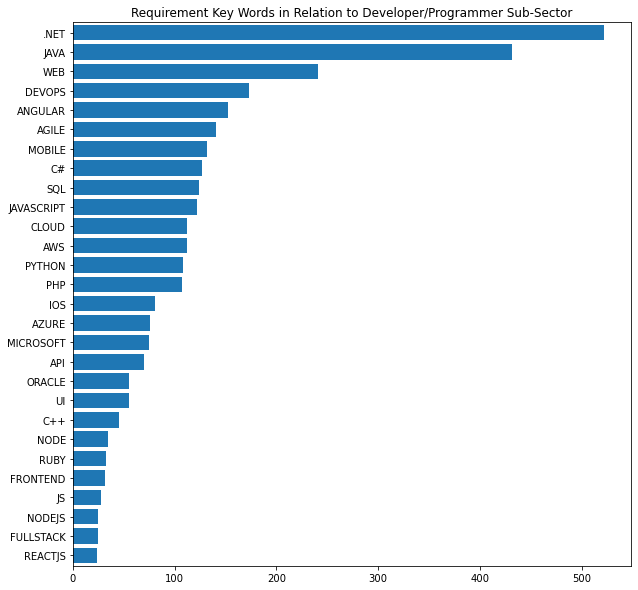

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.title('Requirement Key Words in Relation to Developer/Programmer Sub-Sector')
plt.barh(list(skillsDict.keys()), list(skillsDict.values()), align='center')
plt.margins(y=0.005)
plt.show()

In [37]:
pv = pd.pivot_table(df, index = ['Classification'], columns = ['Location'], aggfunc=len, fill_value=0)
pv.head(60)

Area           \
Location                                 ACT Adelaide   
Classification                                          
Accounting                               180      269   
Administration & Office Support          319      378   
Advertising, Arts & Media                 22       20   
Banking & Financial Services              47      101   
CEO & General Management                  22       50   
Call Centre & Customer Service            49      137   
Community Services & Development          77      172   
Construction                             212      240   
Consulting & Strategy                     51       31   
Design & Architecture                     47       36   
Education & Training                     288      284   
Engineering                              175      248   
Farming, Animals & Conservation            5       24   
Government & Defence                     606      255   
Healthcare & Medical                     375      786   
Hospitality & Tourism                    326      498   
Human Resources & Recruitment            107      110   
Information & Communication Technology  2057      546   
Insurance & Superannuation                19       45   
Legal                                    100       83   
Manufacturing, Transport & Logistics     170      550   
Marketing & Communications               126      107   
Mining, Resources & Energy                 9      157   
Real Estate & Property                    71       70   
Retail & Consumer Products               255      283   
Sales                                    102      246   
Science & Technology                      32       32   
Self Employment                            5       11   
Sport & Recreation                        28       62   
Trades & Services                        367      819   

                                                                 \
Location                               Adelaide Hills & Barossa   
Classification                                                    
Accounting                                                    6   
Administration & Office Support                              15   
Advertising, Arts & Media                                     0   
Banking & Financial Services                                  2   
CEO & General Management                                      0   
Call Centre & Customer Service                                0   
Community Services & Development                              9   
Construction                                                  3   
Consulting & Strategy                                         0   
Design & Architecture                                         0   
Education & Training                                         14   
Engineering                                                   1   
Farming, Animals & Conservation                               6   
Government & Defence                                         10   
Healthcare & Medical                                         27   
Hospitality & Tourism                                        33   
Human Resources & Recruitment                                 3   
Information & Communication Technology                        1   
Insurance & Superannuation                                    0   
Legal                                                         0   
Manufacturing, Transport & Logistics                         26   
Marketing & Communications                                    1   
Mining, Resources & Energy                                    1   
Real Estate & Property                                        2   
Retail & Consumer Products                                    8   
Sales                                                         1   
Science & Technology                                          0   
Self Employment                                               0   
Sport & Recreation                                            0   
Trades & Servi

In [38]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
# data is loaded above as newDF
# Build App
app = JupyterDash(__name__)

trace1 = go.Bar(x=pv.index, y=pv[('Area','Melbourne')], name='Melbourne')
trace2 = go.Bar(x=pv.index, y=pv[('Area','Sydney')], name='Sydney')
trace3 = go.Bar(x=pv.index, y=pv[('Area','Brisbane')], name='Brisbane')
trace4 = go.Bar(x=pv.index, y=pv[('Area','Perth')], name='Perth')

app.layout = html.Div(children=[
    html.H1(children='Jobs by Sector'),
    dcc.Graph(
        id='example-graph',
        figure={
            'data': [trace1, trace2, trace3, trace4],
            'layout':
            go.Layout(title='Location of Jobs in Each Sector', barmode='stack', margin = dict(b = 200,t=50))
        })
])
# Run app and display result inline in the notebook
app.run_server(mode='inline')

In [39]:
pv = pd.pivot_table(df, index = ['AverageSalary'], columns = ['Location'], aggfunc=len, fill_value=0)
pv.head(60)

Area                                                            \
Location        ACT Adelaide Adelaide Hills & Barossa Albany & Great Southern   
AverageSalary                                                                   
15.0           1070     1254                       45                      34   
35.0            406      618                       30                      10   
45.0            453     1007                       37                      21   
55.0            315      718                       30                      13   
65.0            379      734                       23                      15   
75.0            502      563                       15                      18   
90.0            391      445                        3                      13   
110.0           537      476                        5                      10   
135.0           509      321                        0                       5   
175.0           976      338                        2                       6   
599.5           711      176                        3                       5   

                                                             \
Location      Albury Area Alice Springs & Central Australia   
AverageSalary                                                 
15.0                   78                                54   
35.0                   54                                11   
45.0                   64                                37   
55.0                   36                                27   
65.0                   58                                37   
75.0                   47                                44   
90.0                   31                                20   
110.0                  20                                29   
135.0                  11                                18   
175.0                  13                                12   
599.5                   4                                12   

                                                                   \
Location      Bairnsdale & Gippsland Ballarat & Central Highlands   
AverageSalary                                                       
15.0                              68                          119   
35.0                              45                           63   
45.0                              50                           84   
55.0                              49                           60   
65.0                              47                           74   
75.0                              45                           76   
90.0                              19                           40   
110.0                             23                           43   
135.0                              4                           22   
175.0                             12                           11   
599.5                             16                           11   

                                                    \
Location      Bendigo, Goldfields & Macedon Ranges   
AverageSalary                                        
15.0                                           143   
35.0                                           136   
45.0                                           123   
55.0                                            73   
65.0                                            95   
75.0                                           104   
90.0                                            39   
110.0                                           53   
135.0                                           20   
175.0                                           17   
599.5                                            5   

                                             ...                     Title  \
Location      Blue Mountains & Central West  ... Tamworth & North West NSW   
AverageSalary                                ...                             
15.0                                   

In [40]:
for column in pv:
    total = pv[column].sum()
    pv[column]=pv[column] / total
pv.head(60)

Area                                     \
Location            ACT  Adelaide Adelaide Hills & Barossa   
AverageSalary                                                
15.0           0.171227  0.188571                 0.233161   
35.0           0.064970  0.092932                 0.155440   
45.0           0.072492  0.151429                 0.191710   
55.0           0.050408  0.107970                 0.155440   
65.0           0.060650  0.110376                 0.119171   
75.0           0.080333  0.084662                 0.077720   
90.0           0.062570  0.066917                 0.015544   
110.0          0.085934  0.071579                 0.025907   
135.0          0.081453  0.048271                 0.000000   
175.0          0.156185  0.050827                 0.010363   
599.5          0.113778  0.026466                 0.015544   

                                                   \
Location      Albany & Great Southern Albury Area   
AverageSalary                                       
15.0                         0.226667    0.187500   
35.0                         0.066667    0.129808   
45.0                         0.140000    0.153846   
55.0                         0.086667    0.086538   
65.0                         0.100000    0.139423   
75.0                         0.120000    0.112981   
90.0                         0.086667    0.074519   
110.0                        0.066667    0.048077   
135.0                        0.033333    0.026442   
175.0                        0.040000    0.031250   
599.5                        0.033333    0.009615   

                                                                        \
Location      Alice Springs & Central Australia Bairnsdale & Gippsland   
AverageSalary                                                            
15.0                                   0.179402               0.179894   
35.0                                   0.036545               0.119048   
45.0                                   0.122924               0.132275   
55.0                                   0.089701               0.129630   
65.0                                   0.122924               0.124339   
75.0                                   0.146179               0.119048   
90.0                                   0.066445               0.050265   
110.0                                  0.096346               0.060847   
135.0                                  0.059801               0.010582   
175.0                                  0.039867               0.031746   
599.5                                  0.039867               0.042328   

                                            \
Location      Ballarat & Central Highlands   
AverageSalary                                
15.0                              0.197347   
35.0                              0.104478   
45.0                              0.139303   
55.0                              0.099502   
65.0                              0.122720   
75.0                              0.126036   
90.0                              0.066335   
110.0                             0.071310   
135.0                             0.036484   
175.0                             0.018242   
599.5                             0.018242   

                                                    \
Location      Bendigo, Goldfields & Macedon Ranges   
AverageSalary                                        
15.0                                      0.176980   
35.0                                      0.168317   
45.0                                      0.152228   
55.0                                      0.090347   
65.0                                      0.117574   
75.0                                      0.128713   
90.0                                      0.048267   
110.0                                     0.065594   
135.0                                     0.024752   
175.0                                     0.021040   
599.5                  

In [41]:
app = JupyterDash(__name__)

trace1 = go.Bar(x=pv.index, y=pv[('Area','Melbourne')], name='Melbourne')
trace2 = go.Bar(x=pv.index, y=pv[('Area','Sydney')], name='Sydney')
trace3 = go.Bar(x=pv.index, y=pv[('Area','Brisbane')], name='Brisbane')
trace4 = go.Bar(x=pv.index, y=pv[('Area','Perth')], name='Perth')

app.layout = html.Div(children=[
    html.H1(children='Salary by Location'),
    dcc.Graph(
        id='example-graph',
        figure={
            'data': [trace1, trace2, trace3, trace4],
            'layout':
            go.Layout(title='Salary by Location', margin = dict(b = 200,t=50))
        })
])
# Run app and display result inline in the notebook
app.run_server(mode='inline')

In [60]:
x = df.loc[df["Classification"] == "Information & Communication Technology"]

In [61]:
x = x.loc[x["Location"] == "Brisbane"]

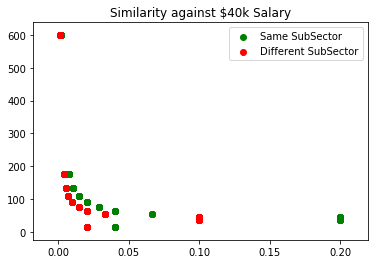

In [89]:
#Assume our item has a subCategory of Developers/Programmers and an Average Salary of 40
def f(row):
    if row["SubClassification"] == "Developers/Programmers":
        val = 1
    else:
        val = 0.5
    val = val / abs((40 - row["AverageSalary"]))
    return val

x["Similarity"] = x.apply(f, axis=1)

plt.scatter(x.loc[x["SubClassification"] == "Developers/Programmers"]["Similarity"], x.loc[x["SubClassification"] == "Developers/Programmers"]["AverageSalary"], color = 'green', marker='o');
plt.scatter(x.loc[x["SubClassification"] != "Developers/Programmers"]["Similarity"], x.loc[x["SubClassification"] != "Developers/Programmers"]["AverageSalary"], color = 'red', marker='o');

plt.title("Similarity against $40k Salary")
plt.legend(["Same SubSector", "Different SubSector"])

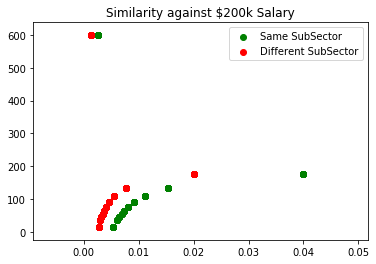

In [91]:
#Assume our item has a subCategory of Developers/Programmers and an Average Salary of 40
def f(row):
    if row["SubClassification"] == "Developers/Programmers":
        val = 2
    else:
        val = 0.5
    val = val / abs((200 - row["AverageSalary"]))
    return val

x["Similarity"] = x.apply(f, axis=1)

plt.scatter(x.loc[x["SubClassification"] == "Developers/Programmers"]["Similarity"], x.loc[x["SubClassification"] == "Developers/Programmers"]["AverageSalary"], color = 'green', marker='o');
plt.scatter(x.loc[x["SubClassification"] != "Developers/Programmers"]["Similarity"], x.loc[x["SubClassification"] != "Developers/Programmers"]["AverageSalary"], color = 'red', marker='o');

plt.title("Similarity against $200k Salary")
plt.legend(["Same SubSector", "Different SubSector"])